In [15]:
!pip install pandas_datareader
!pip install yfinance --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 64.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-linux_x86_64.whl size=317816 sha256=56938f38a8a0d7cac2fe99ad0c2319c3f7c46d64ca8424eb637708119a139123
  Stored in directory: /home/c4aa6a31-8778-4e79-96de-ab90cdd4435a/.cache/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/7 [websockets]g]  WARNING: The script websockets is installed in '/home/c4aa6a31-8778-4e79-96

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import seaborn as sns
import datetime as dt

sns.set() 

stocks = ["GOOG", "SPY"]
start = dt.date.today() - dt.timedelta(days=365)
end = dt.date.today()

data = yf.download(stocks, start=start, end=end)["Close"]
print(data.head())

[*********************100%***********************]  2 of 2 completed

Ticker            GOOG         SPY
Date                              
2024-06-05  176.235275  527.950500
2024-06-06  177.509232  527.940613
2024-06-07  175.120544  527.298767
2024-06-10  175.997391  528.928040
2024-06-11  177.551819  530.201843


In [24]:
returns = np.log(data).diff().dropna()
returns.head()

Ticker,GOOG,SPY
Date,,
2024-06-06,0.007203,-0.000019
2024-06-07,-0.013548,-0.001216
2024-06-10,0.004995,0.003085
2024-06-11,0.008793,0.002405
2024-06-12,0.007659,0.008179


In [28]:
sample = returns.sample(60).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.000000,0.688486
SPY,0.688486,1.000000


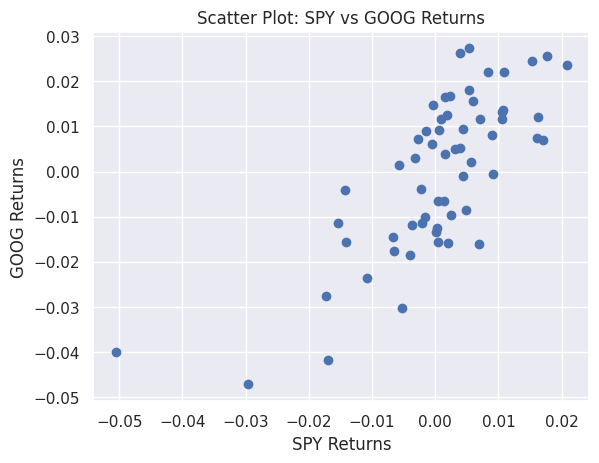

In [31]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample['GOOG'])
plt.xlabel('SPY Returns')
plt.ylabel('GOOG Returns')
plt.title('Scatter Plot: SPY vs GOOG Returns')
plt.show()

In [33]:
reg = np.polyfit(sample['SPY'],sample['GOOG'],deg=1)
reg

array([ 1.14470885e+00, -8.72954008e-04])

In [ ]:
trend = np.polyval(reg,sample['SPY'])
plt.scatter(sample[]'SP')